1. Preamble

This is a practice project for classification. I will analyze 5 datasets from Kaggle.

Data Scientist Job Market in the U.S.: https://www.kaggle.com/sl6149/data-scientist-job-market-in-the-us

Credit Approval Data Set: https://www.kaggle.com/anikannal/solar-power-generation-data

Solar Power Generation Data: https://www.kaggle.com/anikannal/solar-power-generation-data

Brazilian E-Commerce Public Dataset by Olist: https://www.kaggle.com/olistbr/brazilian-ecommerce

Classify gestures by reading muscle activity: https://www.kaggle.com/kyr7plus/emg-4


The initial approach is:

a) import the databases
    
    i) check for all paramenters required to get the file properly loaded

b) table cleansing:
    
    i) adjust columns headers and indexes
    ii) evaluate table completeness (NaN, field types, etc)

c) Numerical columns:

    i) quick statistical analysis (descriptive statistics) of the columns (range - minimum and maximum, mean, standard deviation, median, mode)
    ii) graphical evaluation (whisker box-plot and histograms)

d) Categorical columns:
    
    i) sort uniques to check for mispelling or variations of equivalent values
    ii) count of distinct values
    iii) graphical representation of the counts

e) Initial exploration
    
    i) scatterplot of each parameter versus the expected classification

Let's start!!!

In [1]:
# Default libraries: pandas, numpy
import pandas as pd
import numpy as np

import math

# Load collections of functions
from matplotlib import pyplot as plt
from collections import Counter
from datetime import datetime

Data Scientist Job Market in the U.S.: https://www.kaggle.com/sl6149/data-scientist-job-market-in-the-us

Context
For those who are actively looking for data scientist jobs in the U.S., the best news this month is the LinkedIn Workforce Report August 2018. According to the report, there is a shortage of 151,717 people with data science skills, with particularly acute shortages in New York City, San Francisco Bay Area and Los Angeles.

To help job hunters (including me) to better understand the job market, I scraped Indeed website and collected information of 7,000 data scientist jobs around the U.S. on August 3rd. The information that I collected are: Company Name, Position Name, Location, Job Description, and Number of Reviews of the Company.

Content
alldata.csv If you want to explore the job market around the U.S., download this one because it aggregates all information and cleans the job description by removing the tags.
all other files. If you want to explore specific city or region, you can download any of them.
Acknowledgements
Special thanks to Indeed for not blocking me : )

Inspiration
If you have no clue of where to start, check my blog for inspiration.
Link to my PowerPoint Slides for Presentation.
Link to my GitHub Code.
Reach me at sl6149@nyu.edu
Possible Questions:

Who gets hired? What kind of talent do employers want when they are hiring a data scientist?
Which location has the most opportunities?
What skills, tools, degrees or majors do employers want the most for data scientists?
What's the difference between data scientist, data engineer and data analyst?
Can you develop an efficient classification algorithm to differentiate the three job types above?

In [2]:
# import sys
# print(sys.path)

In [3]:
# A. IMPORT DATA - alldata.csv
main_path = 'C:\\Users\\map_f\\OneDrive\\Documents\\Dropbox\\Springboard\\Project\\Preet\\'
project_path = 'DS_market\\'
file_name = 'alldata.csv'

path = main_path + project_path
file = path + file_name

# parser = TextFileReader(fp_or_buf, **kwds)
raw_data = pd.read_csv(file,index_col= None,delimiter=',')
# type(raw_data)

In [4]:
# B. DATA "CLEANSING"
raw_data.shape

(6964, 5)

Data has 6964 entries and 5 columns.

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


Observing the count of Non-Null entries in the data we can notice that reviews column has null values.
The 5 columns are: position, company, description, reviews, and location. These column names seem reasonable but we can evaluate it better taking a quick look into the data.

Dtype is aligned to the columns name meaning.

In [6]:
raw_data.head(10)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"
8,Analyst - CIB Credit Research,SunTrust,Works closely with senior CIB professionals. P...,3343.0,"Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA 30338"


Position is the position name, as well as company is the company name, description is the job description, reviews is a count of how many reviews that company had with some NaN as mentioned before, and location shows City, State, and Zip Code. Location is an incomplete field so for a more accurate analysis of geographical location we will need to split it into the 3 fields.

Data type is adequated to the fields we are presenting.

In [7]:
# C. Numerical columns
raw_data['reviews'].describe()

count      5326.000000
mean       3179.089185
std        8448.515056
min           2.000000
25%          27.000000
50%         230.000000
75%        1578.000000
max      148114.000000
Name: reviews, dtype: float64

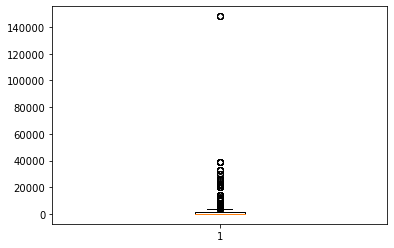

In [8]:
plt.clf
plt.boxplot(raw_data['reviews'].dropna())
plt.show()

<AxesSubplot:>

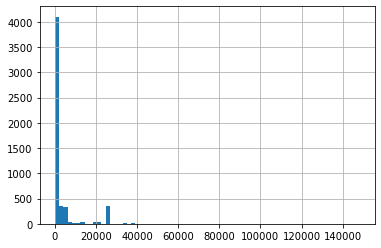

In [9]:
raw_data['reviews'].hist(bins=int(math.sqrt(raw_data['reviews'].count()))) # "ideal" bin size: sqrt(N)

In [10]:
# reviews
lst = raw_data['reviews']
data = Counter(lst)
data.most_common(1)  # Returns the highest occurring item

[(25902.0, 224)]

The average 3k reviews are number inflated by the mode 26k. The most of values are close to zero. So any analysis relying on reviews average won't be significative.

In [11]:
# D. Categorical

In [12]:
uniques = list()
uniques = list(set(raw_data['position']))
# uniques = uniques.sort()
print(uniques)

[nan, 'Bioinformatics Scientist (CA)', 'Data Scientist Lead - Global Research & Data Analytics - ED', 'Program/Project Coordinator Opportunity - This is not a Technical IT role, but rather a support role for data analysis, system updates and reporting.', 'Human Resources Specialist or Human Resources Advisor', 'Optical Technician III (663385)', 'Software Development Engineer, Developer Infrastructure', 'Research Assistant', 'Senior Data Scientist I – Bioinformatics Developer', 'Technician II-Test (660965) - Security Clearance Required', 'Personal Financial Management - Chief Data Scientist - Vice President - New York City', 'Learning and Development Coordinator', 'Pricing & Promotions Data Scientist', 'Senior Scientist II, Quality Technical Operations', 'Telemetry Tracking & Command/Communications Project Engineer II (662650) - Security clearance requir', 'Data Scientist, Digital', 'Data Scientist/Software Engineer', 'Construction Materials and Geotechnical Testing Laboratory Technicia

In [13]:
# position
lst = raw_data['position']
data = Counter(lst)
data.most_common()   # Returns all unique items and their counts

[('Data Scientist', 351),
 ('Senior Data Scientist', 96),
 ('Research Analyst', 64),
 ('Data Engineer', 60),
 ('Machine Learning Engineer', 56),
 ('Lead Data Scientist', 31),
 ('Research Scientist', 30),
 ('Sr. Data Scientist', 28),
 ('Principal Data Scientist', 24),
 ('Data Analyst', 22),
 ('Software Engineer', 22),
 ('Quantitative Analyst', 21),
 ('Scientist', 17),
 ('Product Manager', 17),
 ('Bioinformatics Scientist', 16),
 ('Market Research Analyst', 15),
 ('Senior Software Engineer', 14),
 ('Machine Learning Scientist', 13),
 ('Software Engineer, Machine Learning', 13),
 ('Senior Research Analyst', 12),
 ('Senior Data Engineer', 12),
 (nan, 11),
 ('Associate Scientist', 11),
 ('Senior Scientist', 11),
 ('Software Development Engineer', 11),
 ('Staff Data Scientist', 11),
 ('Lead Data Engineer', 9),
 ('Research Associate', 9),
 ('Student Research Collaboration', 9),
 ('Sr. Data Engineer', 8),
 ('Senior Machine Learning Engineer', 8),
 ('Senior Machine Learning Scientist', 8),
 ('C

In [14]:
# bar graph of values for the variable
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# x = data[slice(None),slice(1)]
# y = data[slice(None),slice(2)]
# ax.bar(x,y)
# plt.show()

In [15]:
# help(set())

In [16]:
# D. Visual exploration
# plt.clf
# plt.plot(kind='scatter',x=)

In [17]:
def job_classification (position):
    """
    This function classifies the job position by looking for keywords in the job title.
    """
    if ('analyst' in position.lower()) :
        job_class = 'Data Analyst'
    elif ('enginneer' in position.lower()) :
        job_class = 'Data Enginneer'
    elif ('scientist' in  position.lower()) :
        job_class = 'Data Scientist'
    else :
        job_class = 'TBD'
    return job_class

# raw_data['job_class'] = raw_data.apply(job_classification(raw_data['position']))

I'll need to create parse the job description to create a list of qualifications to advance on the position classification.